In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re


Graficamos en el tiempo

In [99]:
VCC = 3.3
n = 10

Fs = 1000
#cargamos los datos desde el archivo txt
datos = np.loadtxt("Ejercicio.txt")
print(datos)
datos = datos[:, 6] #el 5 y 6 contienen la información
print(datos)
datos = 1000*((((datos/(2**n)) - 0.5) * VCC)/1009)

frec_muestreo = Fs #por el teorema de Nyquist
tiempo = np.arange(len(datos)) / frec_muestreo

[[  0.   0.   0. ... 543.  26.   1.]
 [  1.   0.   0. ... 540.  26.   1.]
 [  2.   0.   0. ... 540.  26.   1.]
 ...
 [  3.   0.   0. ... 520.  26.   1.]
 [  4.   0.   0. ... 511.  26.   1.]
 [  5.   0.   0. ... 504.  26.   1.]]
[478. 473. 475. ... 591. 586. 581.]


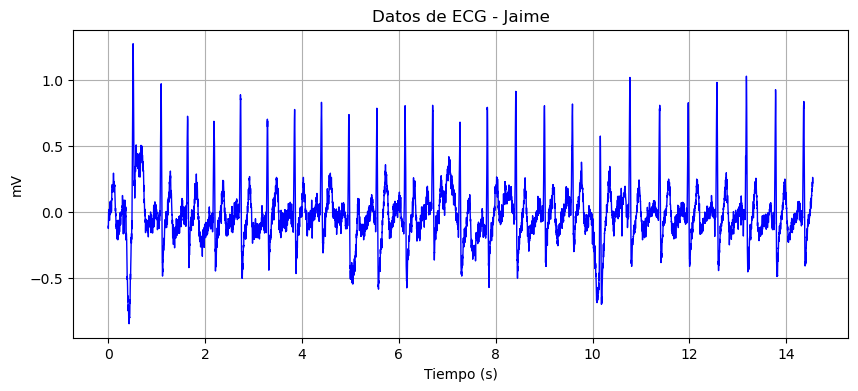

In [102]:
#Graficamos toda la señal en el tiempo

plt.figure(figsize=(10, 4))  # Ajusta el tamaño del gráfico según tus necesidades
plt.plot(tiempo, datos, lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('mV')
plt.title('Datos de ECG - Jaime')
plt.grid(True)
plt.show()

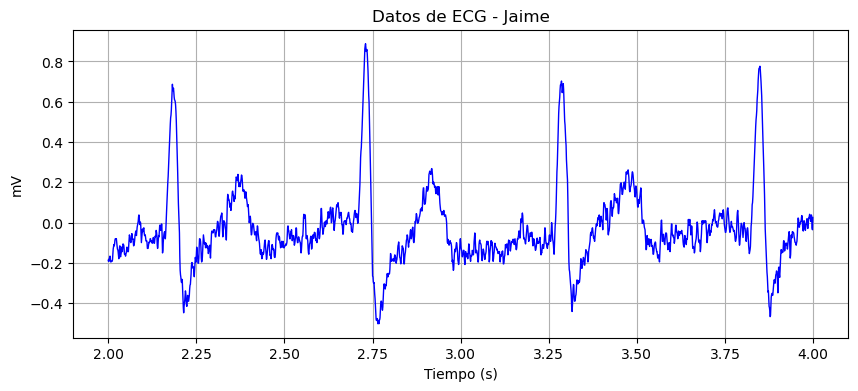

In [104]:
#Graficamos una parte de toda la señal

inicio = 2
fin = 4
inicio_muestreo = int(inicio*frec_muestreo)
fin_muestreo = int(fin*frec_muestreo)
tiempo_intervalo = tiempo[inicio_muestreo:fin_muestreo]
columna_intervalo = datos[inicio_muestreo:fin_muestreo]

plt.figure(figsize=(10, 4))  # Ajusta el tamaño del gráfico según tus necesidades
plt.plot(tiempo_intervalo, columna_intervalo, lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('mV')
plt.title('Datos de ECG - Jaime')
plt.grid(True)

Graficamos en frecuencia

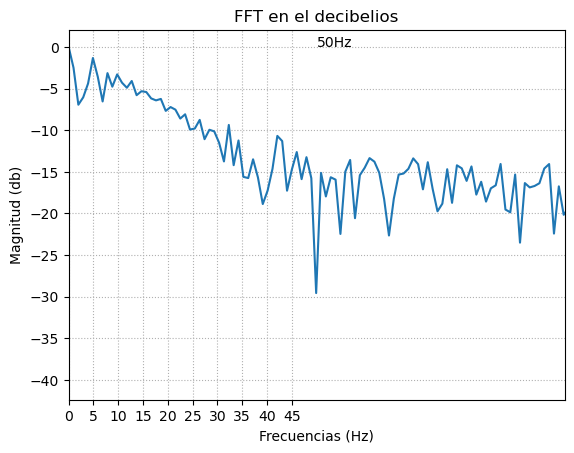

In [92]:
N = 2**10    
F = 50                        # 10 bits, 0-1023
signal_fft = np.fft.fft(datos, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2]
signal_aux = signal_fft/signal_fft.max()

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,frec_muestreo/2, N//2)


plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,100])
plt.xticks(np.arange(0,50,5))
plt.show()